### **ANN 回歸Regression**
**預測未知資料的趨勢** \
-> **預測發電廠在未來一小時產生的發電功率**

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



### **資料前處理**

欄位 :  \
AT : Average Ambient Temperature \
V : Exhuast Vacuum  \
AP : AMbient Pressure \
RH : Relative Humidity \
PE : Preedicted Electrical energy output 

In [20]:
# 讀取資料集
data_df = pd.read_excel('.\CCPP\Folds5x2_pp.xlsx')
data_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [21]:
# 定義特徵X、標籤Y
# 當我在這個特徵X 下， 我得到的發電功率為Y
# iloc = numpy選取範圍 [第幾筆資料，第幾個特徵]
data_X = data_df.iloc[:,:-1].values
print(data_X, type(data_X), data_X.shape)
data_Y = data_df.iloc[:, -1].values
print(data_Y, type(data_Y), data_Y.shape)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]] <class 'numpy.ndarray'> (9568, 4)
[463.26 444.37 488.56 ... 429.57 435.74 453.28] <class 'numpy.ndarray'> (9568,)


In [22]:
# 隨機切割資料集 fomr sci-kit learn
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_Y, test_size= 0.2, random_state= 42)
print(type(data_X_train), data_X_train.shape)
print(type(data_X_test), data_X_test.shape)
print(type(data_Y_train), data_Y_train.shape)
print(type(data_Y_test), data_Y_test.shape)


<class 'numpy.ndarray'> (7654, 4)
<class 'numpy.ndarray'> (1914, 4)
<class 'numpy.ndarray'> (7654,)
<class 'numpy.ndarray'> (1914,)


In [23]:
data_X_train

array([[  21.92,   49.02, 1009.29,   88.56],
       [  11.09,   40.43, 1025.47,   74.97],
       [   8.49,   39.61, 1021.05,   87.74],
       ...,
       [  27.79,   69.23, 1012.86,   45.71],
       [  12.26,   41.5 , 1014.87,   89.41],
       [  11.75,   40.55, 1018.09,   97.7 ]])

### **建立ANN模型**

**什麼?! 竟然沒有資料標準(規一化)!!!**

In [24]:
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Input(shape = (4,)))
ann_model.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))
ann_model.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))
ann_model.add(tf.keras.layers.Dense(units= 1, activation= 'linear'))

In [25]:
ann_model.compile(optimizer = 'adam',loss = 'mse') # mse 平均平方誤差 = batch 中 每一筆資料的se(square error)平方誤差的加總並平均

In [26]:
# 訓練模型
ann_model.fit(x = data_X_train, y = data_Y_train, batch_size= 50, epochs= 100, verbose = 2, validation_split= 0.2)

Epoch 1/100


123/123 - 1s - loss: 274931.6250 - val_loss: 154082.5625 - 1s/epoch - 8ms/step
Epoch 2/100
123/123 - 0s - loss: 83084.5781 - val_loss: 30871.6387 - 459ms/epoch - 4ms/step
Epoch 3/100
123/123 - 0s - loss: 9764.5869 - val_loss: 891.9758 - 386ms/epoch - 3ms/step
Epoch 4/100
123/123 - 0s - loss: 476.0125 - val_loss: 395.6275 - 403ms/epoch - 3ms/step
Epoch 5/100
123/123 - 0s - loss: 390.9926 - val_loss: 390.8020 - 349ms/epoch - 3ms/step
Epoch 6/100
123/123 - 0s - loss: 386.0233 - val_loss: 385.6577 - 354ms/epoch - 3ms/step
Epoch 7/100
123/123 - 0s - loss: 380.5018 - val_loss: 379.6568 - 337ms/epoch - 3ms/step
Epoch 8/100
123/123 - 0s - loss: 374.3785 - val_loss: 373.3646 - 355ms/epoch - 3ms/step
Epoch 9/100
123/123 - 0s - loss: 367.7238 - val_loss: 366.4199 - 413ms/epoch - 3ms/step
Epoch 10/100
123/123 - 0s - loss: 360.6920 - val_loss: 358.9334 - 419ms/epoch - 3ms/step
Epoch 11/100
123/123 - 0s - loss: 353.0135 - val_loss: 351.0205 - 335ms/epoch - 3ms/step
Epoch 12/100
123/123 - 0s - loss: 

### **模型預測**

In [27]:
Y_test_predict = ann_model.predict(x= data_X_test)

60/60 [==============================] - 0s 2ms/step


In [33]:
Y_test_predict= Y_test_predict.reshape(-1)
print(Y_test_predict, Y_test_predict.shape)

array([455.31738, 436.24542, 432.14026, ..., 478.43073, 434.05612,
       455.88992], dtype=float32)

In [35]:
data_Y_test
print(data_Y_test, data_Y_test.shape)

[455.27 436.31 440.68 ... 479.53 435.76 457.1 ] (1914,)


In [36]:
# 劃出預測誤差
np.set_printoptions(precision=2)#  預測的小數點調至小數點第二位 -> numpy顯示的數字都調整至小數點第二位
print(Y_test_predict, Y_test_predict.shape)

[455.32 436.25 432.14 ... 478.43 434.06 455.89] (1914,)


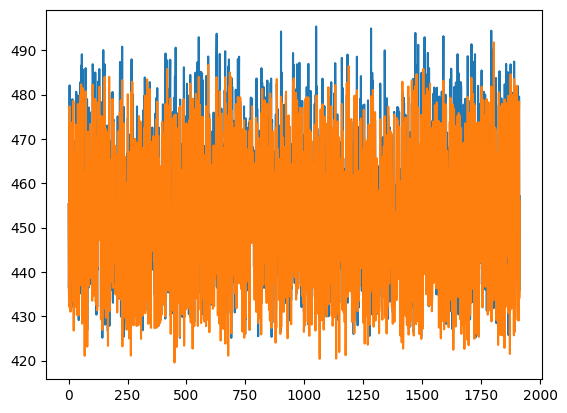

In [40]:
# 畫圖比較誤差
plt.plot(data_Y_test)
plt.plot(Y_test_predict)
plt.show()
print(np.vstack((Y_test_predict,data_Y_test)))


[[455.32 436.25 432.14 ... 478.43 434.06 455.89]
 [455.27 436.31 440.68 ... 479.53 435.76 457.1 ]]
